# Import files, proteins, construct and filter the network

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# for Louvain algo
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import k_clique_communities

from community import community_louvain

# for copying graph
import copy


# # set seed
# import random
# random.seed(2013)

# basic settings for plotting figures
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)

In [2]:
'''
STE24 - YJR117W
RCE1  - YMR274C
RAM1  - YDL090C
'''
# Proteins that we focus on
def print_protein(str):
    if str == 'YJR117W':
        return 'STE24(YJR117W)'
    elif str == 'YMR274C':
        return 'RCE1(YMR274C)'
    elif str == 'YDL090C':
        return 'RAM1(YDL090C)'

In [3]:
# Store proteins into a list
all_proteins = ['YJR117W', 'YMR274C', 'YDL090C']

In [4]:
# Store the network as G
# Storing format - dictionary: { u: {v1: {'weight': 123.0}, v2: {'weight': 456.0} } }; u, v - str
G = nx.read_weighted_edgelist("cleanData.txt",comments="#",nodetype=str)

In [5]:
# Remove edges with confidence score <= 700
threshold = 700
for edge in G.edges:     
    # edge (u, v), an edge between node u and node v
    u = edge[0]
    v = edge[1]
    weight = G[u][v]['weight']

    if weight <= threshold:
        G.remove_edge(u,v)

# Total number of nodes and edge after filtered

In [6]:
print(f'Total number of data is {len(G)}\n')
print('number of edges of G:',G.number_of_edges())

Total number of data is 5228

number of edges of G: 46908


# Explore Louvain algorithm

## same seed, different resolution

In [7]:

# weight = 'None' as unweighted graph
# random_state: int; seed
# resolution: int; control the community size

resolution = [1.0, 3.0, 10.0, 100.0, 1000.0]

partitions = {} # { resolution1: {community1: [], community1: []}, resolution1: {community1: [], community1: []} }
for res in resolution:
    partitions[res] = {}

for res in resolution:
    
    # {protein1: community, protein2: community, ...} - {string : int}   
    partition_Louvain = community_louvain.best_partition(G, weight = 'None', random_state = 2013, resolution = res) 

    # initialise the partition data struction
    all_community = set() 
    for community in partition_Louvain.values():
        all_community.add(community)

    for community in all_community:
        partitions[res][community] = []

    # fill in the nodes in each community
    for protein, community in partition_Louvain.items():
        partitions[res][community].append(protein)

# print our the results:
for res in partitions.keys():
    print(f'''Resolution {res}:
    Total number of communities: {len(partitions[res])}
    
    ''')

Resolution 1.0:
    Total number of communities: 802
    
    
Resolution 3.0:
    Total number of communities: 844
    
    
Resolution 10.0:
    Total number of communities: 1040
    
    
Resolution 100.0:
    Total number of communities: 1590
    
    
Resolution 1000.0:
    Total number of communities: 3409
    
    


## Modularity distribution under different seeds

In [8]:
loop_time = 100
all_modularity = []
max_modularity = float('-inf')
chosen_seed = -1


for i in range(loop_time):
    seed = i
    temp_partition = community_louvain.best_partition(G, weight = 'None', random_state = seed, resolution = 1.0)
    # https://python-louvain.readthedocs.io/en/latest/api.html
    temp_modularity = community_louvain.modularity(temp_partition, G, weight='None')
    
    all_modularity.append(temp_modularity) # store only for future reference
    
    if temp_modularity >= max_modularity:
        max_modularity = temp_modularity
        partition_Louvain = temp_partition
        chosen_seed = i

In [9]:
print(f'The maximum modularity is: {max_modularity}; while the minimum modularity is {min(all_modularity)}')
print(f'The seed that achieve the max modularity is: {chosen_seed}')

The maximum modularity is: 0.6508386752671642; while the minimum modularity is 0.641071157012028
The seed that achieve the max modularity is: 82


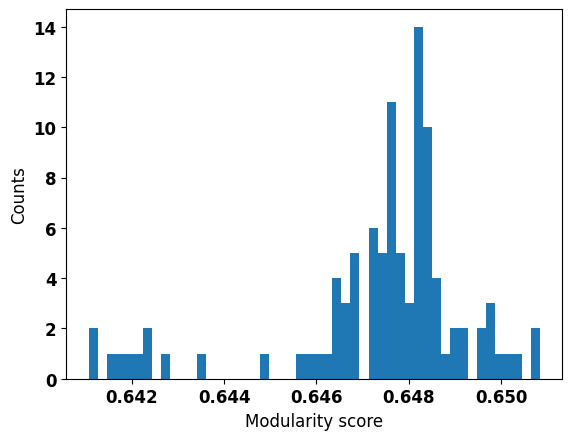

In [10]:
# histogram
plt.hist(all_modularity, bins = 50)
plt.xlabel('Modularity score')
plt.ylabel('Counts') 

plt.show()